mirror_driver.ipynb
Eric Graves - eridgraves@gmail.com
Created 06/30/2019

## Mechanical Mirror Test Code
Beta code to transfer images to a stylized "lo-fi" mirror representation
As seen: https://www.smoothware.com/danny/newshinyballsmirror.html

<3-3-2020> I have fixed the Anaconda environment issues that caused this to previously break on the first cell. Now, the orthagonal pixels for a square shape are calculated both with and without prefiltering. Next is to work a staggered-pixel scheme to see if it can capture an image better (measured completely subjectively).

In [8]:
# Imports and environment setup
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
import os
%matplotlib inline

# DEBUG shows input and output images, DEBUG_VERBOSE shows images and sizes at each step
DEBUG = True
DEBUG_VERBOSE = True

if not DEBUG :
    DEBUG_VERBOSE = False # Can only be enabled in DEBUG mode

# Test image name
TEST_IMAGE = 'Lenna.png'#'image5.png'# 
# print current directory for debugging?

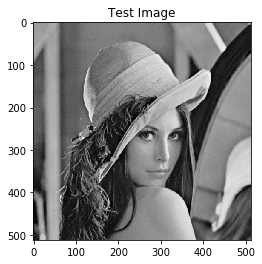

In [14]:
img = cv.imread(TEST_IMAGE, 0)
h,w = img.shape[:2]
if DEBUG_VERBOSE :
    #print(img.shape)
    plt.imshow(img,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()

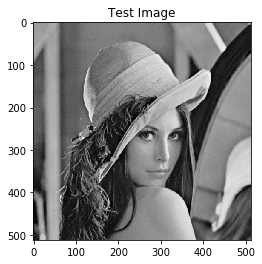

(512, 512)


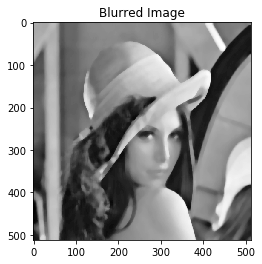

(512, 512)


In [15]:
# Determine refresh rate --> probably 1/sec or so

# Get an image and crop to square 
img_crop = img[0:h,0:h] #img.crop(0,0,h,h) #img[0:w,0:w] 
if DEBUG : 
    plt.imshow(img_crop,cmap='gray') # Use grayscale image
    plt.title("Test Image")
    plt.show()
    print(img_crop.shape)
    
# Make destination image of same size
dst = np.zeros(h);

# Use Median Blur to average pixel areas over 50 x 50 regions
#-- Calculate kernel size : must be odd
mb_kern = (int) (h/50)
if mb_kern % 2 == 0:
    mb_kern += 1
    
#-- Blur over kernal size 
dst = cv.medianBlur(img_crop, mb_kern)
if DEBUG_VERBOSE : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Blurred Image")
    plt.show()
    print(dst.shape)

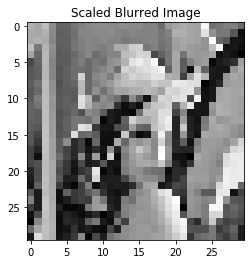

(30, 30)


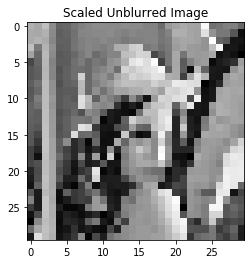

In [17]:
## SQUARE OUTPUT PIXELS IN A GRID 
#-- These arrays (out and dst) can be used to scale mechanical mirror "pixels", i.e. servo motors, from their 
#-- 8-bit values here.

# Resize image to 50x50 pixels
#-- From Median Blurred Image : looks better
out = cv.resize(dst, (30,30))
if DEBUG : 
    plt.imshow(out,cmap='gray') # Use grayscale image
    plt.title("Scaled Blurred Image")
    plt.show()
    print(out.shape)
    #print(out)
    
#-- Without Median Blur : 
dst = cv.resize(img_crop, (30,30))
if DEBUG_VERBOSE : 
    plt.imshow(dst,cmap='gray') # Use grayscale image
    plt.title("Scaled Unblurred Image")
    plt.show()
    #print(dst.shape)

In [18]:
## [WIP] Square OUTPUT PIXELS IN DIAGONAL GRID
##-- Stagger each row so that pixels form lines at 45 degrees (or so)
##-- Center of pixels above will line up with the edges

# Get cell size
cell_diam = 30
cell_radius = (int) (cell_diam / 2)
if cell_radius % 2 == 0:
    cell_radius += 1
    
## Get first row of areas centers
centers_x_off = []
centers_x_norm = []
centers_y = []
REG_FLAG = True
cell_center = cell_radius


    
# Reset temporary array
temp = []

# Offset center column
for i in range(cell_diam, h, cell_diam):
    temp.append(i) # Just x values
    #temp.append((i, j)) # Append coordinates
row = np.array(temp)
centers_x_off.append(row)

# Reset temporary array
temp = []
 
# Regular Center column
for i in range(cell_radius, h, cell_diam): # Cut off rightmost point to make rows have equal number of members
    temp.append(i) # Just x values
    #temp.append((i, j)) # Append coordinates
row_d = np.array(temp)
centers_x_norm.append(row_d)
REG_FLAG = True


# For rows of cells in the image
for j in range(cell_center, h, cell_diam): # y-values of center points
    centers_y.append(j) # Append y coordinates to separate array
    

# Make it a numpy array so it behaves
centers_y = np.array(centers_y)
centers_x_norm = np.asarray(centers_x_norm)
centers_x_off = np.asarray(centers_x_off)

# Center points coordinates are stored:
#-- x in centers_x
#-- y in centers_y
if DEBUG:
    #print(centers_x)
    #print("CENTER_COORD: ")
    #print(centers_y.shape)
    print(centers_y)
    print(centers_x_norm)
    print(centers_x_off)
    print("Size of centers_y: " + ((str) (centers_y.size)))
    print("Size of centers_x_off: " + ((str) (centers_x_off.size)))
    print("Size of centers_x_norm: " + ((str) (centers_x_norm.size)))

## For each center point:
for y in range(0, centers_y.size - 1): # cell row number (iterator for centers_y)
    
    for x in range(0, centers_x_off.size - 1): # cell column number (iterator for centers_x) : off and norm should be the same size
        
        # Average values of each point within cell_radius
        
    # (center_x - cell_radius, center_y - cell_radius) === (center_x + cell_radius, center_y - cell_radius)
    #  ||                                                                                              ||
    #  ||                                     (center_x, center_y)                                     ||
    #  ||                                                                                              ||
    # (center_x - cell_radius, center_y + cell_radius) === (center_x + cell_radius, center_y + cell_radius)
    
# Assign all cells within cell_radius this average value

SyntaxError: unexpected EOF while parsing (<ipython-input-18-62035b330034>, line 79)

In [ ]:
# TODO:
#-- Finish staggered pixel version.

# Send to output
#-- Can this be parallelized?
#-- For now: print out as text --> done